<a href="https://colab.research.google.com/github/JunHyeong-data/python-data-analysis-book-study/blob/main/ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그래프와 시각화

- 정보 시각화(플롯plot)은 데이터 분석에서 매우 중요한 일
- 시각화는 특잇값을 찾거나, 데이터 변형이 필요한지 알아보거나, 아이디어를 찾기 위한 과정의 일부
- 파이썬 다양한 시각화 도구를 제공(맷플롯립과 맷플롯립 기반 도구)
- 맷플롯립은 주로 2D 그래프를 위한 데스크톱 패키지로 출판물 수준의 그래프를 만든다
- 맷플롯립은 모든 운영체제의 다양한 GUI 백엔드를 지원하며 PDF, SVG, JPG, PNG, BMP, GIF등 널리사용하는 벡터와 래스터 형식으로 그래프 저장 가능
- 후반부에서는 시본(seaborn) 라이브러리를 살펴볼 것

## 맷플롯립 API 간략하게 살펴보기

In [12]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [13]:
import matplotlib.pyplot as plt

[0 1 2 3 4 5 6 7 8 9]


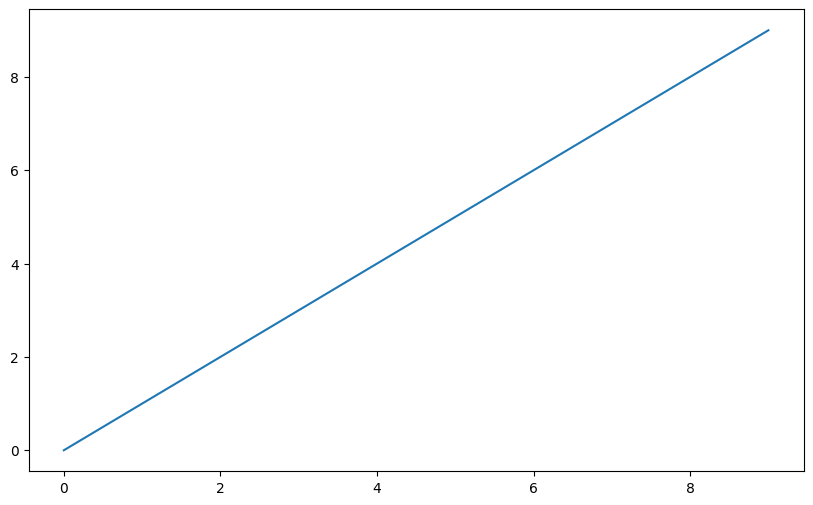

In [14]:
import numpy as np
data = np.arange(10)
print(data)
plt.plot(data)

### 피겨와 서브플롯
- plt.figure에는 다양한 옵션이 있는데 그중 figsize로 파일로 저장할 피겨의 크기와 비율을 지정 가능
- add_subplot을 사용해 최소하나 이상의 subplots를 생성해야 한다.

In [15]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [16]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [17]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

In [18]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
plt.show()

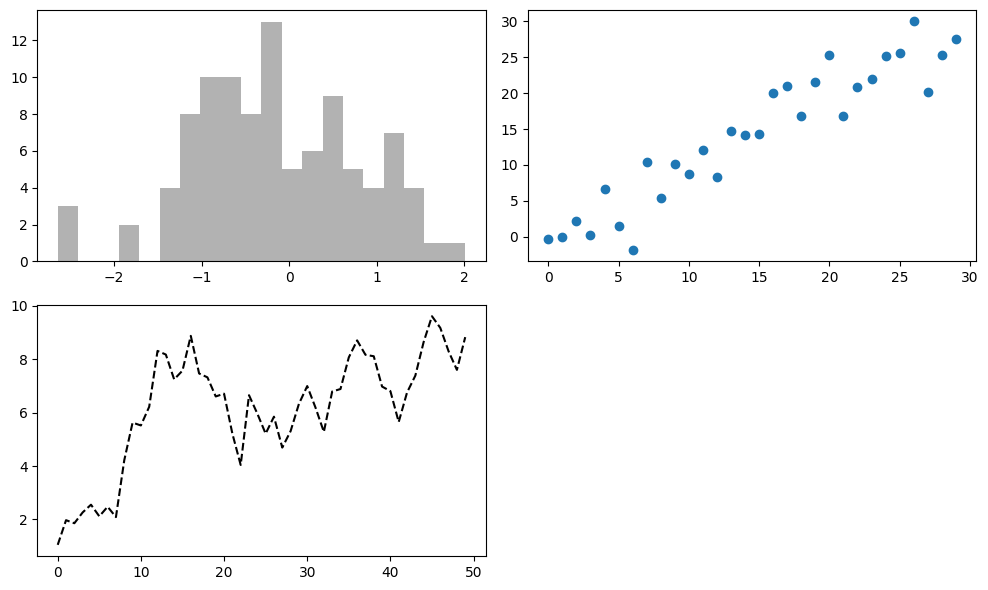

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 각 subplot에 그래프 그리기
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

plt.tight_layout()
plt.show()


In [10]:
plt.close("all")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

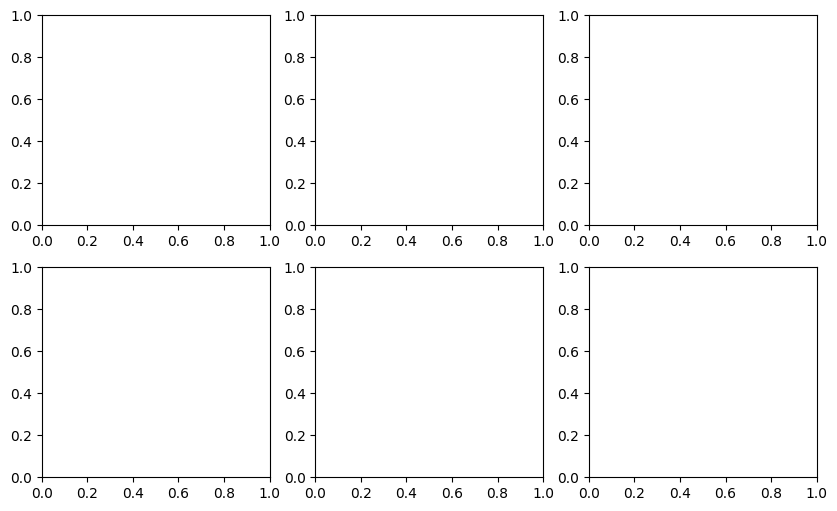

In [20]:
fig, axes = plt.subplots(2, 3)
axes

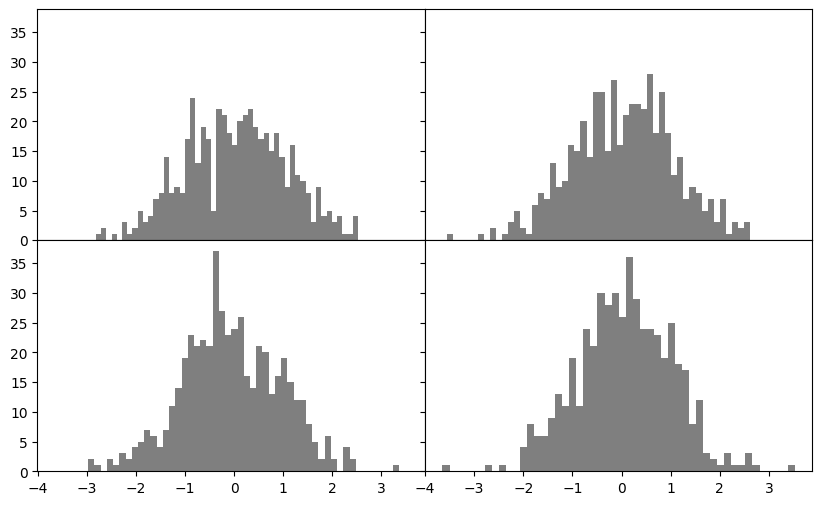

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)
# sharex 모든 서브플롯이 동일한 x축 눈금을 사용하도록 한다
# sharey 모든 서브플롯이 동일한 y축 눈금을 사용하도록 한다

In [23]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

### 색상, 마커, 선 스타일
- 맷플롯립의 plot 함수는 x와 y 좌푯값이 담긴 배열과 추가적으로 색상과 선 스타일 옵션을 인수로 받는다

In [29]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

In [30]:
plt.close("all")

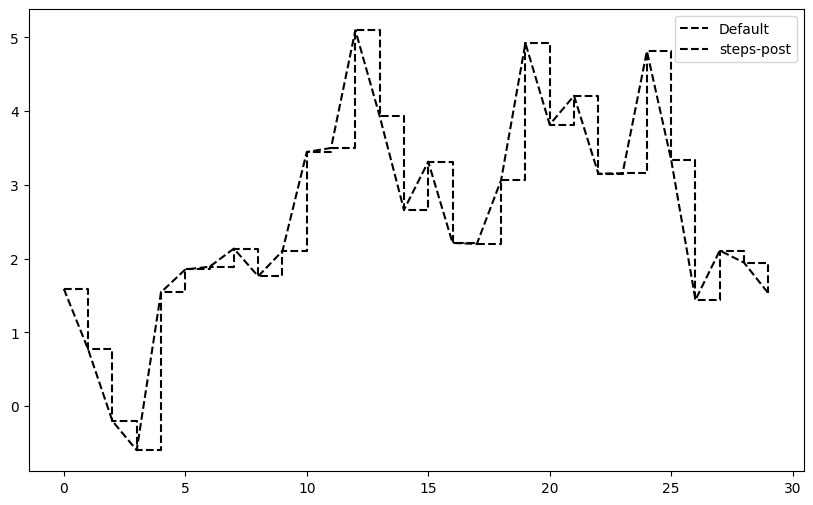

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()
# 범례를 포함시켜 그래프를 생성

### 눈금, 레이블, 범례
- 그래플 꾸미는 방법은 대부분 맷플롯립의 ax 객체 메서드로 접근 가능
    - 아무런 인수도 없이 호출하면 현재 설정된 매개변숫값을 반환
    - 매개변수를 전달하면 매개변숫값을 설정

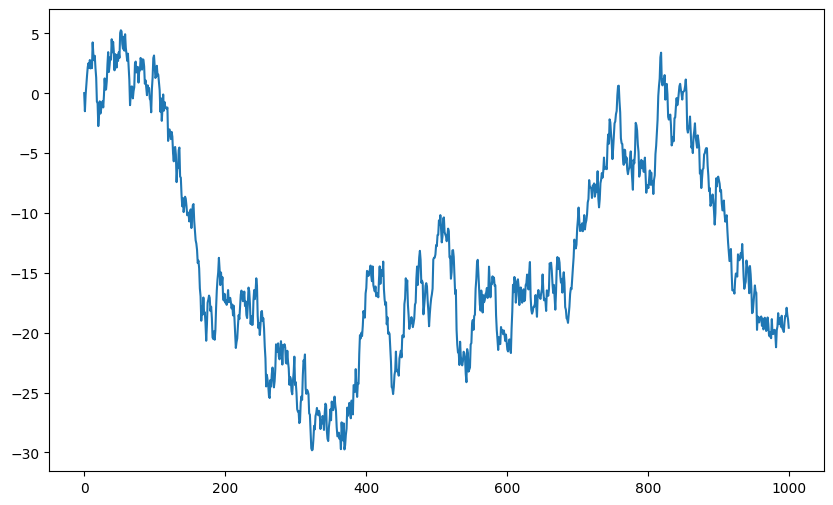

In [34]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

In [35]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

In [39]:
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

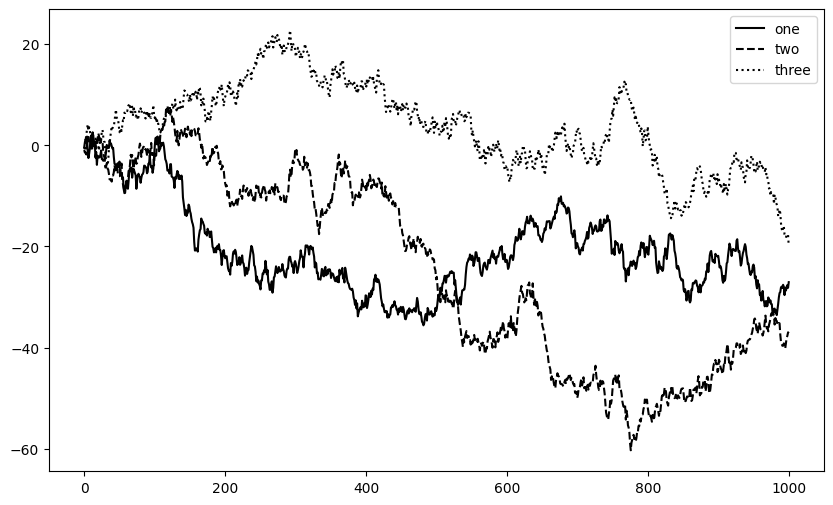

In [41]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");
ax.legend()

In [40]:
ax.legend()

### 주석과 그림 추가하기

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
!rm examples
!ln -s "/content/drive/My Drive/Colab Notebooks/pydata-book-3rd-edition/examples" examples


Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

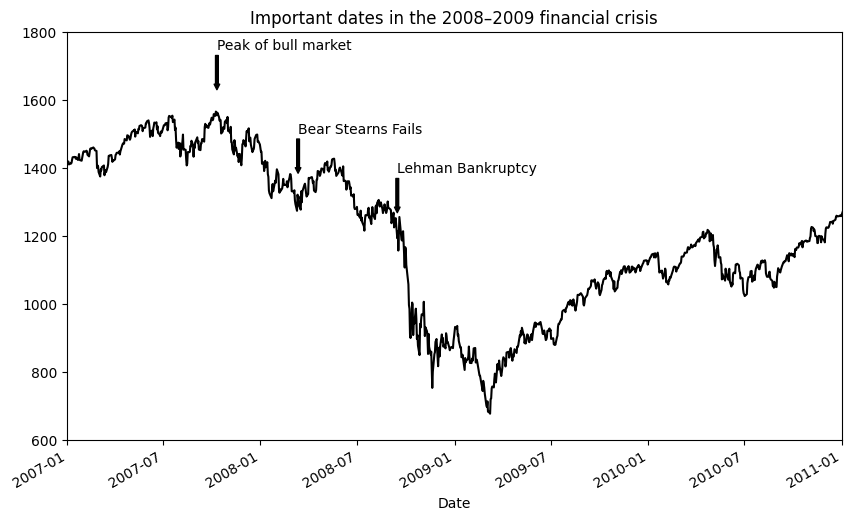

In [57]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

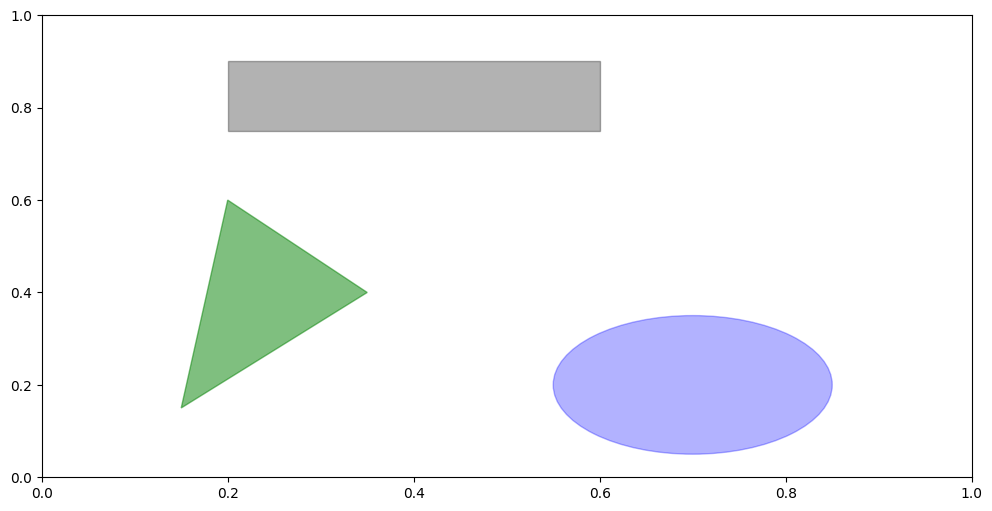

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [59]:
plt.close("all")

## 판다스에서 시본으로 그래프 그리기
- 맷플롯립은 저수준의 라이브러리
- 판다스를 사용하다 보면 행과 열 레이블을 가진 다양한 열 데이터를 다룸
- 다른 라이브러리로는 맷플롯립 기반의 고차원 통계 그래픽 라이브러리인 시본(seaborn)이 있다
- 시본은 흔히 사용하는 다양한 시각화 패턴을 쉽게 구현

### 선그래프

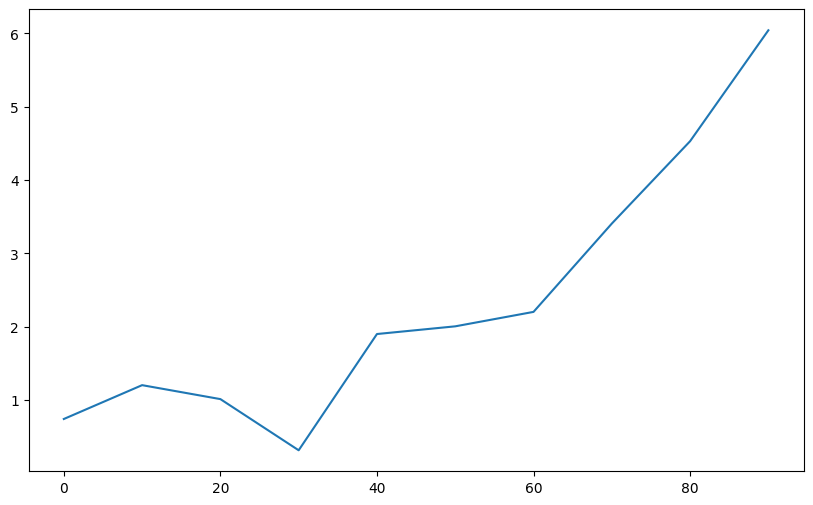

In [64]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

<Axes: >

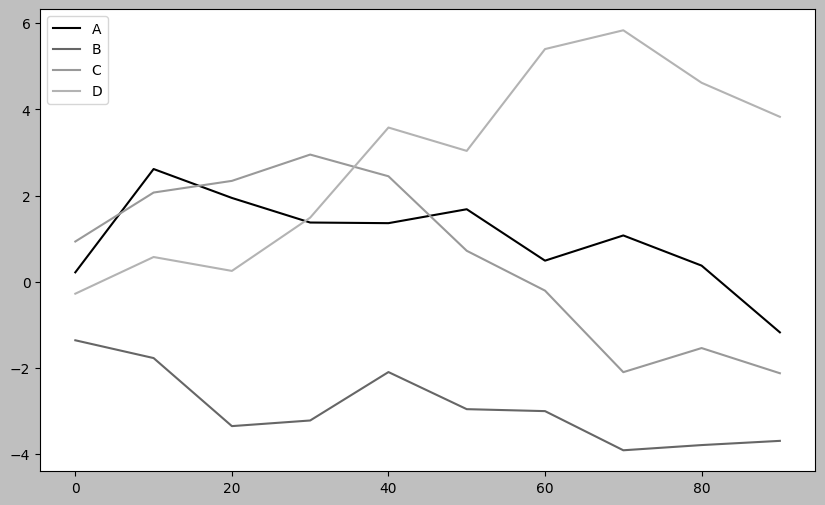

In [65]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

### 막대그래프

<Axes: >

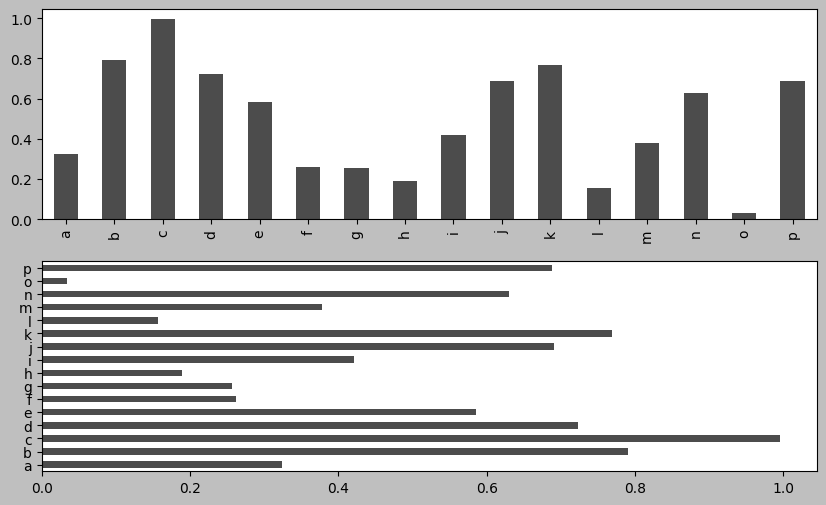

In [66]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [67]:
np.random.seed(12348)

<Axes: >

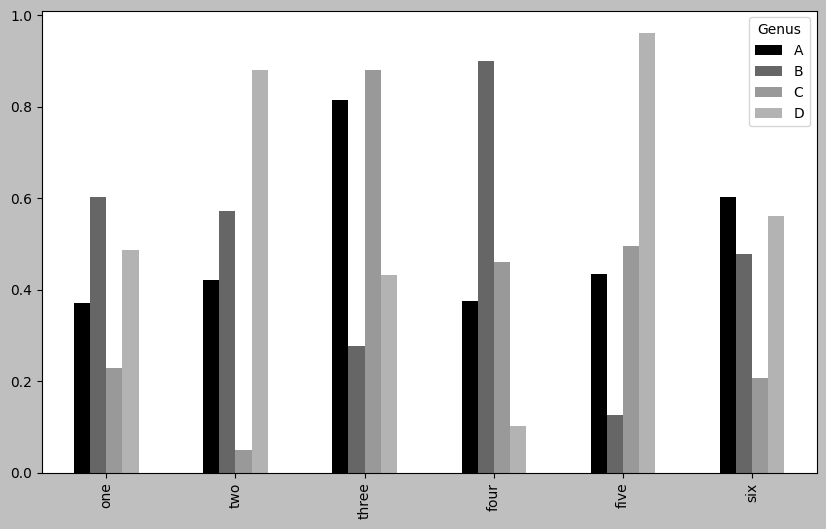

In [68]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

In [69]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

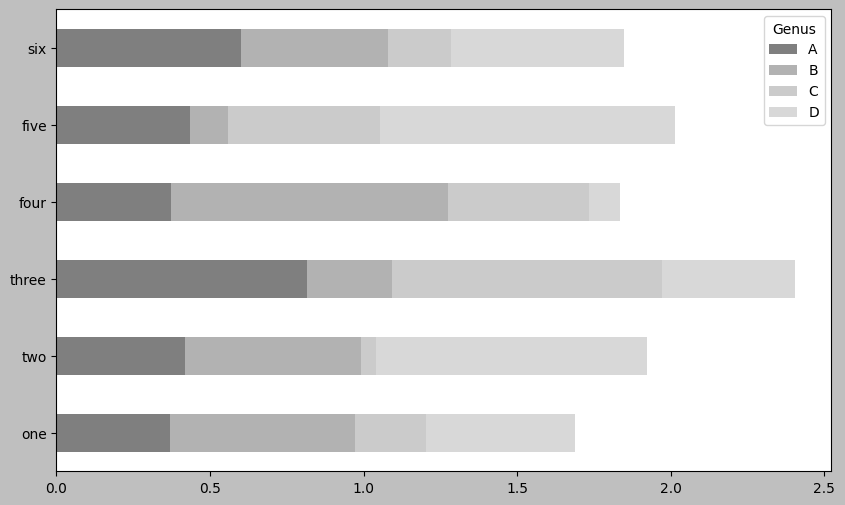

In [70]:
df.plot.barh(stacked=True, alpha=0.5)

In [71]:
plt.close("all")

In [72]:
tips = pd.read_csv("examples/tips.csv")
tips.head()
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [73]:
party_counts = party_counts.loc[:, 2:5]

<Axes: xlabel='day'>

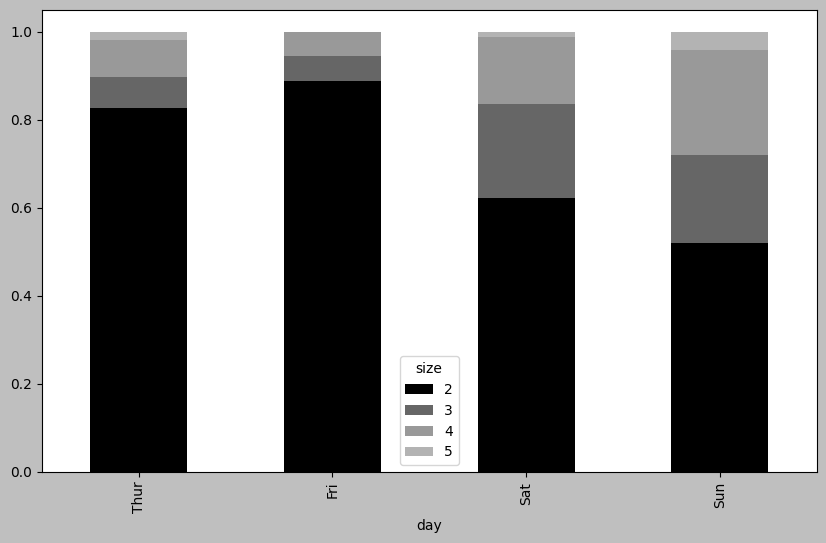

In [74]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts
party_pcts.plot.bar(stacked=True)

In [77]:
plt.close("all")

<Axes: xlabel='tip_pct', ylabel='day'>

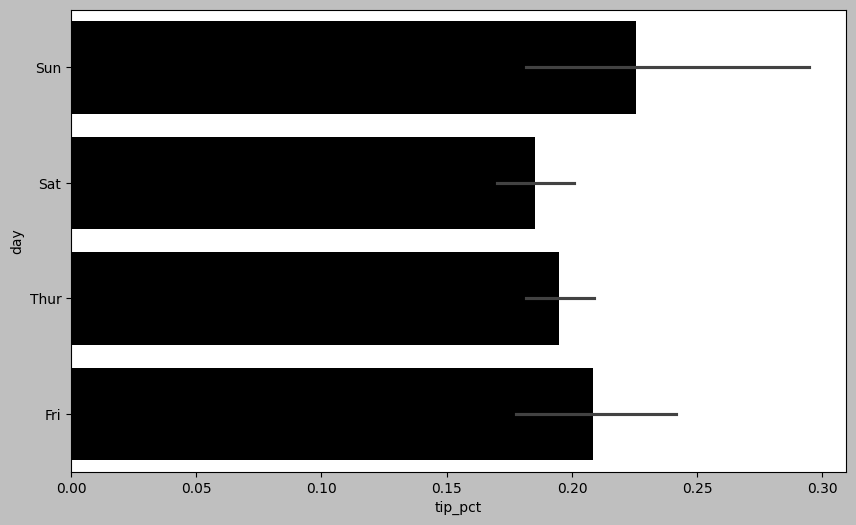

In [78]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [79]:
plt.close("all")

<Axes: xlabel='tip_pct', ylabel='day'>

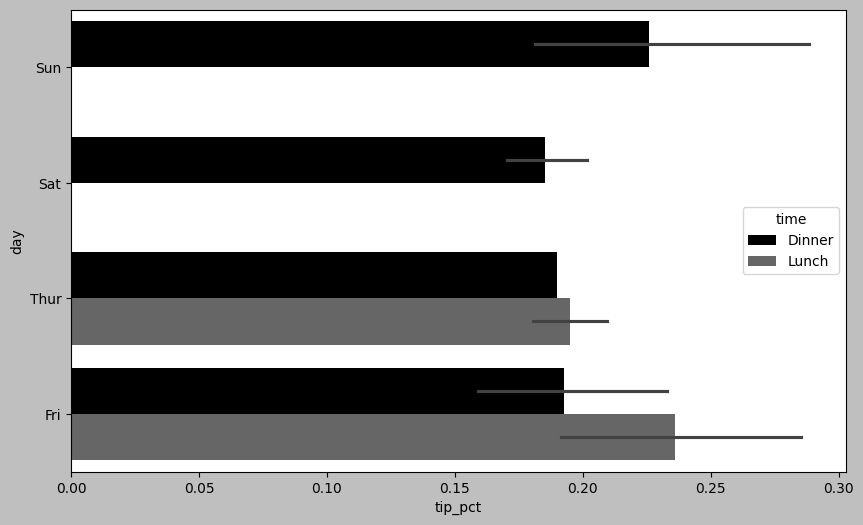

In [80]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [81]:
plt.close("all")

In [82]:
sns.set_style("whitegrid")

In [83]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 히스토그램과 밀도 그래프

<Axes: ylabel='Frequency'>

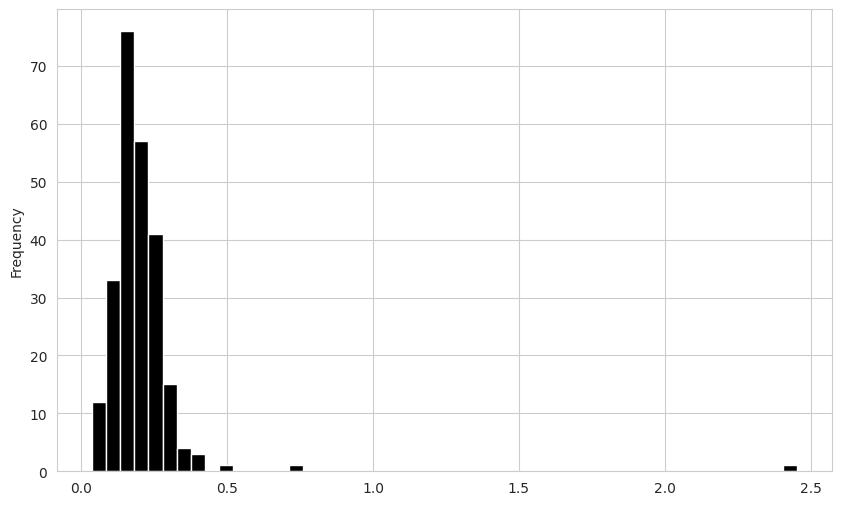

In [84]:
tips["tip_pct"].plot.hist(bins=50)

In [85]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Density'>

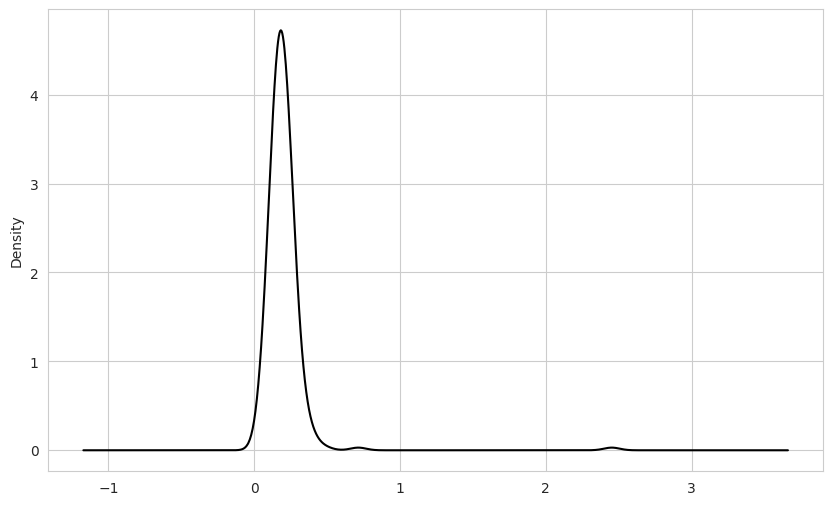

In [86]:
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

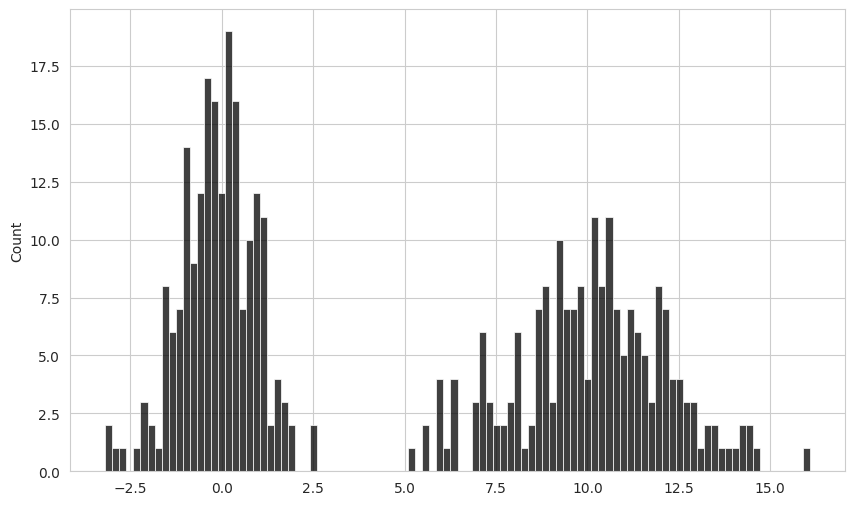

In [87]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

### 산포도

In [88]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [89]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

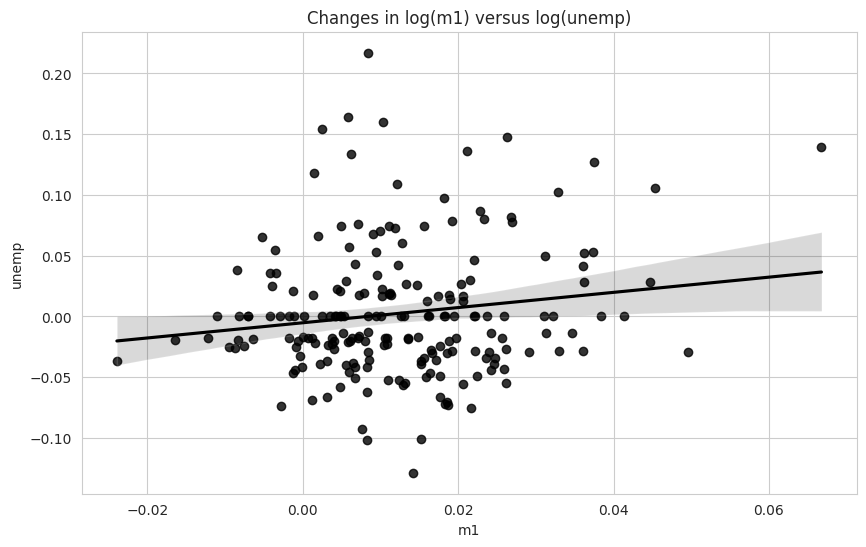

In [90]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

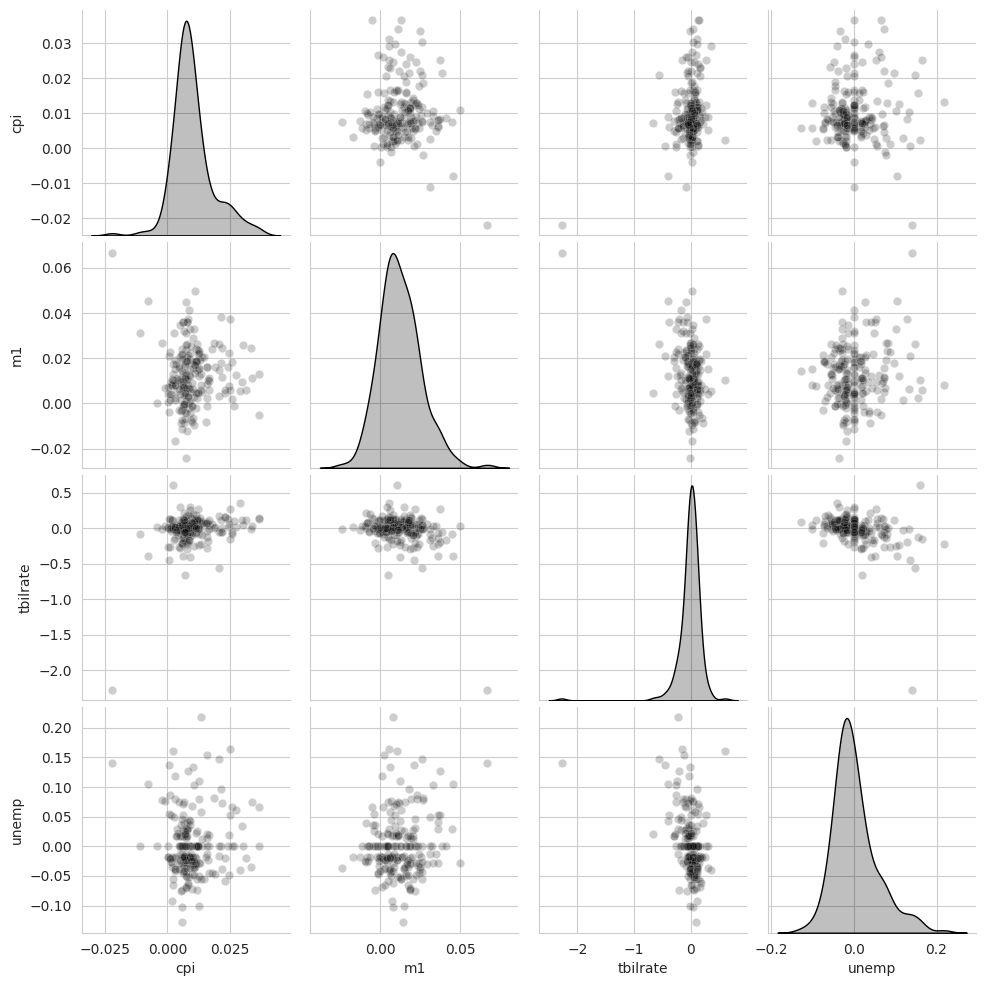

In [91]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

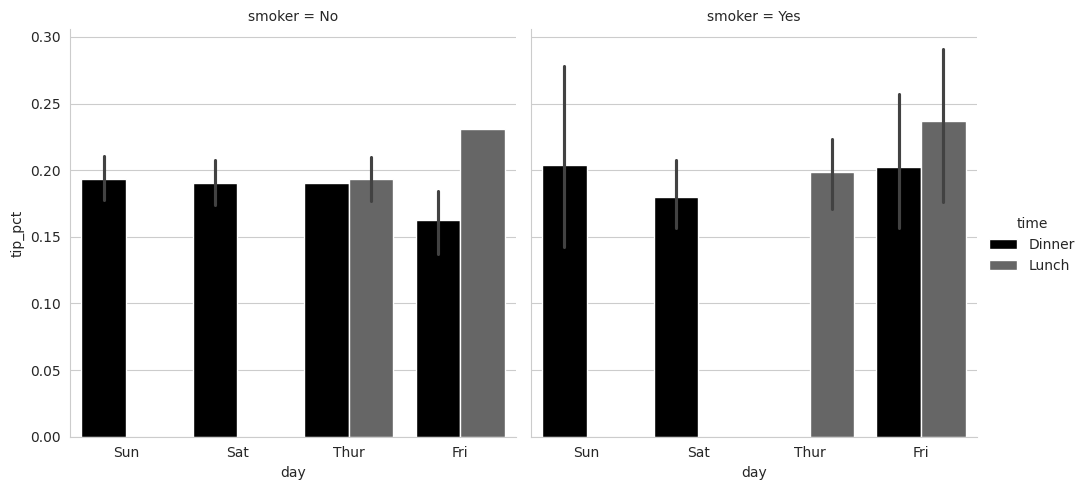

In [92]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

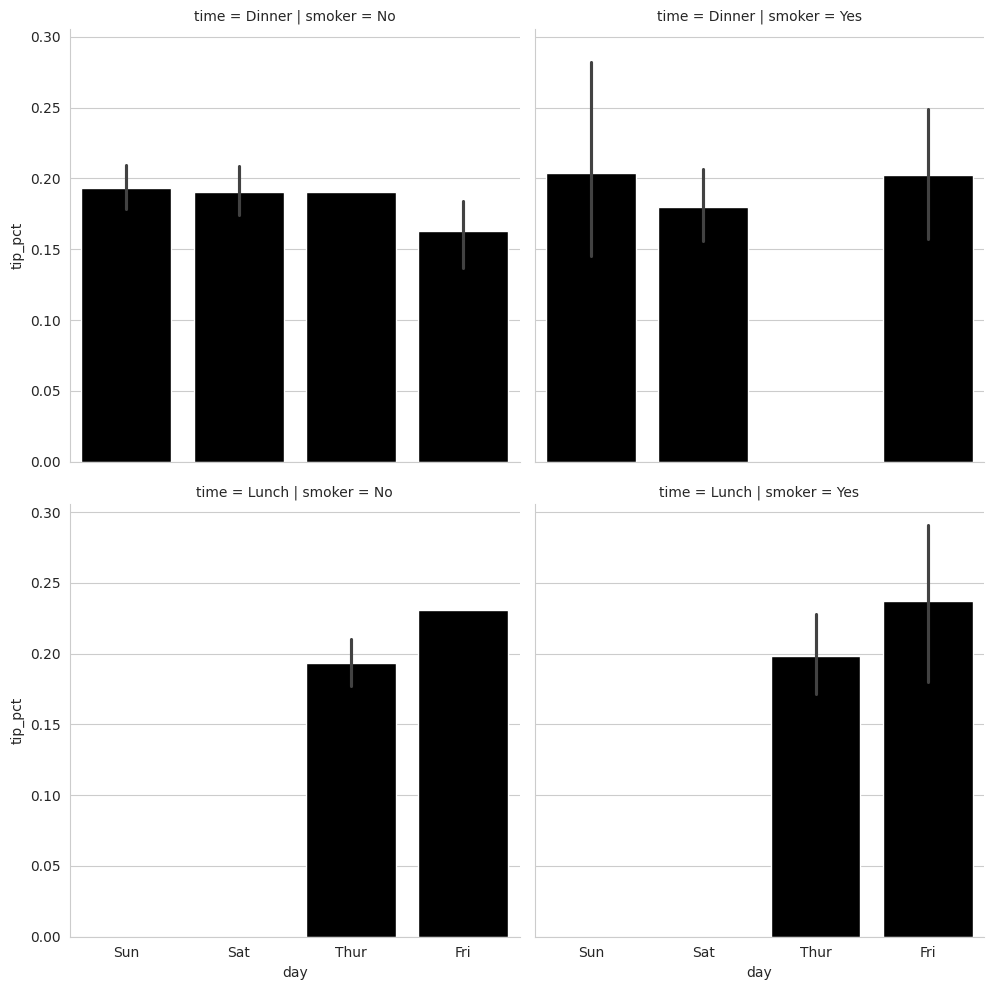

In [93]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

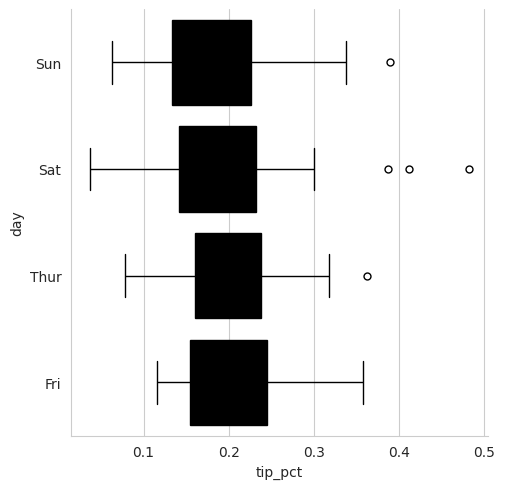

In [94]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

## 마치며
- 이 장의 목적은 판다스, 맷플롯립, 시본으로 기본적인 데이터 시각화에 발을 담그는 것
- 데이터 분석 결과를 시각적으로 공유하는 일이 중요하다면 데이터 시각화와 관련된 자료를 더 많이 찾아보기를 권함